Let's try 3 regressors on auxhist dataset, and predict the downward middle visible solar flux along the whole height domain at the equator.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataDIR = 'af'
DS = xr.open_dataset(dataDIR)

In [3]:
albedo = DS.ALBEDO.values

In [4]:
albedo.shape #days, latitude, longtitude

(71, 36, 72)

In [5]:
albedo2 = np.zeros([71,53,36,72])
albedo2.shape

(71, 53, 36, 72)

In [6]:
for i in range(53):
    albedo2[:,i,:,:] = albedo #need height dimension to 

In [7]:
d_c = DS.TAU_OD.values

In [8]:
d_c.shape 

(71, 52, 36, 72)

In [9]:
tsf = DS.TOASW.values #top solar flux

In [10]:
tsf.shape

(71, 36, 72)

In [11]:
msf = DS.DOWNVISFLUX.values[:,:,:,:] #some middle layer in the down visible flux

In [12]:
albedo.shape

(71, 36, 72)

In [13]:
msf.shape

(71, 53, 36, 72)

In [14]:
msf2 = msf/(1-albedo2)

Let's combine the data together for ten time samples, with full latitude and longitude:

In [15]:
e_t = [] #equator input and output
#input:
for k in range(10): #10 days
    for j in range(72):
        input_array = list(d_c[k,:,18,j]) #add dust profile
        input_array.append(tsf[k,18,j]) #add top solar flux, without the albedo factor
        input_array+=list(msf2[k,:,18,j])            
        e_t.append(input_array) #appends input to input array

In [16]:
e_t = np.array(e_t)
e_t.shape

(720, 106)

In [17]:
e_d = pd.DataFrame(e_t) 
e_d = e_d[e_d.iloc[:,52] != 0] #remove 0 tsf, could later use a simple classifier to determine which data has 0 middle flux...
e_d

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
72,0.246780,0.245793,0.244312,0.241845,0.239377,0.236909,0.234441,0.231973,0.229506,0.227038,...,707.201507,706.543092,706.104012,705.664768,705.225441,704.786032,704.346458,703.906720,703.466817,703.026668
73,0.250943,0.249939,0.248434,0.245924,0.243415,0.240905,0.238396,0.235887,0.233377,0.230868,...,706.575111,705.907415,705.462202,705.016825,704.571366,704.125744,703.679957,703.234089,702.787974,702.341614
74,0.254356,0.253339,0.251813,0.249269,0.246726,0.244182,0.241639,0.239095,0.236552,0.234008,...,709.687103,709.007360,708.554088,708.100650,707.647048,707.193445,706.739676,706.285743,705.831561,705.377214
75,0.242072,0.241104,0.239652,0.237231,0.234810,0.232389,0.229969,0.227548,0.225127,0.222707,...,700.554969,699.902732,699.467880,699.032945,698.597928,698.162910,697.727728,697.292546,696.857116,696.421357
76,0.226333,0.225428,0.224070,0.221807,0.219543,0.217280,0.215017,0.212753,0.210490,0.208227,...,685.809220,685.194001,684.783746,684.373490,683.963194,683.552816,683.142355,682.731853,682.321228,681.910316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.243937,0.242961,0.241497,0.239058,0.236619,0.234179,0.231740,0.229301,0.226861,0.224422,...,532.490889,531.860514,531.440320,531.020207,530.600136,530.180106,529.760159,529.340252,528.920387,528.500522
716,0.246648,0.245662,0.244182,0.241715,0.239249,0.236782,0.234316,0.231849,0.229383,0.226916,...,554.170263,553.544988,553.128138,552.711288,552.294398,551.877548,551.460698,551.043848,550.626957,550.210025
717,0.247792,0.246801,0.245314,0.242836,0.240358,0.237880,0.235402,0.232924,0.230446,0.227968,...,576.546086,575.926007,575.512539,575.099072,574.685564,574.272014,573.858425,573.444794,573.031122,572.617328
718,0.247070,0.246082,0.244600,0.242129,0.239658,0.237188,0.234717,0.232246,0.229776,0.227305,...,594.302388,593.689259,593.280424,592.871589,592.462714,592.053797,591.644758,591.235679,590.826476,590.417070


In [18]:
np.percentile(e_d.iloc[:,52], 25)

183.67874145507812

Split up the data into 3 parts:

In [19]:
e_reml = e_d[e_d.iloc[:,52] > 475] #large flux data, 75th to 100th percentile
e_remm = e_d[e_d.iloc[:,52] <= 475]
e_remm = e_remm[e_remm.iloc[:,52] > 180]#middle flux data, 25th to 75th percentile
e_rems = e_d[e_d.iloc[:,52] <= 180] #small flux data, less than 25th percentile

Train three linear regressors, one for the large flux data and the other for small flux data:

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train_set, test_set = train_test_split(e_reml, test_size=0.2, random_state=42)

train_in = train_set.iloc[:,:53] #training input
train_out = train_set.iloc[:,53:] #training output
test_in = test_set.iloc[:,:53] #testing input 
test_out = test_set.iloc[:,53:] #testing output

#w = 1/train_out**2
lrl = LinearRegression() #linear regression for large flux data
lrl.fit(train_in,train_out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
train_set, test_set = train_test_split(e_remm, test_size=0.2, random_state=42)

train_in = train_set.iloc[:,:53] #training input
train_out = train_set.iloc[:,53:] #training output
test_in = test_set.iloc[:,:53] #testing input 
test_out = test_set.iloc[:,53:] #testing output

#w = 1/train_out**2
lrm = LinearRegression() #linear regression for middle flux data
lrm.fit(train_in,train_out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
train_set, test_set = train_test_split(e_rems, test_size=0.2, random_state=42)

train_in = train_set.iloc[:,:53] #training input
train_out = train_set.iloc[:,53:] #training output
test_in = test_set.iloc[:,:53] #testing input
test_out = test_set.iloc[:,53:] #testing output

#w = 1/train_out**2
lrs = LinearRegression() #linear regression for small flux data
lrs.fit(train_in,train_out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

A custom predictor which can handle all the data:

In [23]:
def clp(in_data): #custom linear predictor
    in_data = np.array(in_data)
    out_data = []
    for instance in in_data:
        if instance[52] > 475:
            out_data.append(lrl.predict(instance[:53].reshape(1,-1))[0]) #uses large flux predictor 
        elif instance[52] > 180:
            out_data.append(lrm.predict(instance[:53].reshape(1,-1))[0]) #uses middle flux predictor 
        else:
            out_data.append(lrs.predict(instance[:53].reshape(1,-1))[0]) #uses small flux predictor
    return np.array(out_data)

In [24]:
total_in = e_d.iloc[:,:53] #total input
total_out = e_d.iloc[:,53:] #total output
total_pred = clp(total_in)

In [25]:
total_pred[1]

array([748.52027897, 748.50238448, 748.50005731, 748.48583732,
       748.47298226, 748.458615  , 748.44706078, 748.43679007,
       748.42522219, 748.40978409, 748.38806618, 748.35970675,
       748.32732242, 748.29440855, 748.26064833, 748.22008944,
       748.17152134, 748.10914616, 748.0101664 , 747.85310091,
       747.62196994, 747.29241013, 746.85363152, 746.29599117,
       745.60189511, 744.72958659, 743.66932025, 742.39191491,
       740.85620675, 739.00160962, 736.80058491, 734.27245914,
       731.44427324, 728.3059222 , 724.93981437, 721.37894074,
       717.75205175, 714.12233309, 711.1513573 , 710.04173703,
       708.93060029, 708.26314908, 707.59527761, 706.92713072,
       706.25865366, 705.81291784, 705.36702376, 704.9210218 ,
       704.47489628, 704.02861068, 703.58223718, 703.13563319,
       702.68879558])

In [26]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(total_out, total_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse  

3.2160134047773554

Plotting data:

In [27]:
total_in.shape

(333, 53)

In [28]:
total_out 

,53,54,55,56,57,58,59,60,61,62,...,96,97,98,99,100,101,102,103,104,105
72,748.265320,748.247385,748.245081,748.231259,748.218261,748.203699,748.192016,748.182473,748.172024,748.157462,...,707.201507,706.543092,706.104012,705.664768,705.225441,704.786032,704.346458,703.906720,703.466817,703.026668
73,748.152573,748.134955,748.132824,748.119221,748.107175,748.092343,748.080051,748.069398,748.057598,748.041946,...,706.575111,705.907415,705.462202,705.016825,704.571366,704.125744,703.679957,703.234089,702.787974,702.341614
74,752.019354,752.001908,751.999923,751.986032,751.975035,751.960731,751.947667,751.934934,751.921291,751.904341,...,709.687103,709.007360,708.554088,708.100650,707.647048,707.193445,706.739676,706.285743,705.831561,705.377214
75,741.214452,741.197141,741.195080,741.181313,741.171091,741.157983,741.145206,741.132840,741.119238,741.102421,...,700.554969,699.902732,699.467880,699.032945,698.597928,698.162910,697.727728,697.292546,696.857116,696.421357
76,724.352033,724.334375,724.331993,724.318030,724.306942,724.294868,724.284273,724.274499,724.262672,724.247149,...,685.809220,685.194001,684.783746,684.373490,683.963194,683.552816,683.142355,682.731853,682.321228,681.910316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,572.707811,572.695215,572.694186,572.687023,572.680478,572.668582,572.656233,572.643720,572.630342,572.613876,...,532.490889,531.860514,531.440320,531.020207,530.600136,530.180106,529.760159,529.340252,528.920387,528.500522
716,593.825653,593.812348,593.811042,593.802390,593.794554,593.783494,593.771822,593.759293,593.746274,593.730888,...,554.170263,553.544988,553.128138,552.711288,552.294398,551.877548,551.460698,551.043848,550.626957,550.210025
717,615.693607,615.679601,615.678172,615.668128,615.659267,615.648773,615.637340,615.624845,615.612432,615.597937,...,576.546086,575.926007,575.512539,575.099072,574.685564,574.272014,573.858425,573.444794,573.031122,572.617328
718,632.801875,632.787212,632.785579,632.774224,632.764912,632.754906,632.743837,632.731952,632.720190,632.705037,...,594.302388,593.689259,593.280424,592.871589,592.462714,592.053797,591.644758,591.235679,590.826476,590.417070


In [30]:
total_in.index

Int64Index([ 72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
            ...
            710, 711, 712, 713, 714, 715, 716, 717, 718, 719],
           dtype='int64', length=333)

In [31]:
np.array([1,2,3,4,5,6,7,8,9])[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1])

In [32]:
all_indices = total_in.index
ti_indices = all_indices[all_indices > 4*72] 
ti_indices = ti_indices[ti_indices < 5*72] 
len(ti_indices) #ith time snapshot indices for latitude/longtitude map, currently set to 6th time snapshot

36

In [33]:
np.concatenate([np.arange(0,72)[36:], np.arange(0,72)[:36]])

array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 35])

In [34]:
total_out = np.array(total_out)
full_out_contour = np.full((53, 72), np.nan)
full_pred_contour = np.full((53, 72), np.nan)
for index in ti_indices:
    long_point = index%72
    full_out_contour[:,long_point] = total_out[np.where(all_indices == index)][0][::-1]
    full_pred_contour[:,long_point] = total_pred[np.where(all_indices == index)][0][::-1] #flips the height to look better

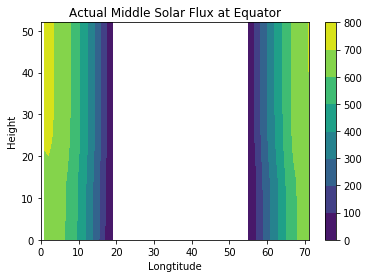

In [39]:
plt.contourf(full_out_contour)
plt.colorbar()
plt.title("Actual Middle Solar Flux at Equator")
plt.xlabel("Longtitude")
plt.ylabel("Height")
plt.show()

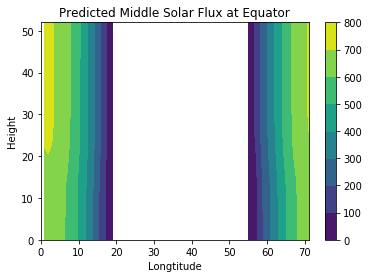

In [40]:
plt.contourf(full_pred_contour)
plt.colorbar()
plt.title("Predicted Middle Solar Flux at Equator")
plt.xlabel("Longtitude")
plt.ylabel("Height")
plt.show()

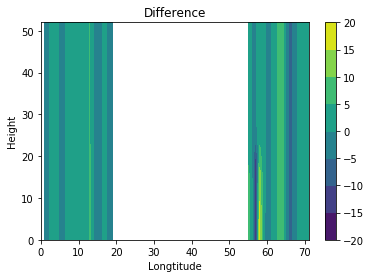

In [37]:
plt.contourf(full_pred_contour - full_out_contour)
plt.colorbar()
plt.title("Difference")
plt.xlabel("Longtitude")
plt.ylabel("Height")
plt.show()

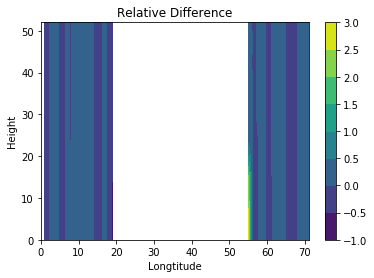

In [38]:
plt.contourf((full_pred_contour - full_out_contour)/full_out_contour)
plt.colorbar()
plt.title("Relative Difference")
plt.xlabel("Longtitude")
plt.ylabel("Height")
plt.show()